# Carbon correlation

Correlate carbon obtained with EEIO with reference studies.
We correlate with two years: 2015 and 2020


In [1]:
from ict_eeio.mrio import (
    get_all_industries,
    load_base,
    get_demand_categories,
    get_industry_output,
    get_monetary_flow,
    get_factor_input_per_Y_unit,
    get_leontief_flow,
    aggregate_sectors,
    get_total_final_demand,
)

from ict_eeio.eeio import (
    get_direct_impact_coefficient,
    get_cba_impact,
    get_pba_impact,
    get_total_direct_impact,
    get_all_satellites_stressors,
)
from ict_eeio.industries import ict_industries, energy_industries
from ict_eeio.satellites import (
    impact_stressors_used,
    impact_stressors_unused,
    satellites,
    impacts,
    clear_mineral_stressors_name,
)
from ict_eeio.sankey import plot_sankey
import pandas as pd
from collections import OrderedDict

# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from ict_eeio.satellites import (
    mineral_stressors,
    mineral_stressors_used,
    mineral_stressors_unused,
)
from ict_eeio.utils import kg_to_Gt
from ict_eeio.mrio import simplify_sections
from ict_eeio.eeio import COE2_NAME
from ict_eeio.utils import kg_to_Mt

# Set seaborn theme for matplotlib
sns.set_theme()

/Users/thibaultsimon/Documents/projects/thesis/1_eeioa/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
exio_ict_agg_2015 = load_base(str("2015"))
aggregate_sectors(exio_ict_agg_2015, industries=ict_industries, aggregation_name="ICT")
exio_ict_agg_2020 = load_base(str("2020"))
aggregate_sectors(exio_ict_agg_2020, industries=ict_industries, aggregation_name="ICT")

exio_ict_2015 = load_base(str("2015"))
exio_ict_2020 = load_base(str("2020"))

1249.8135100782988


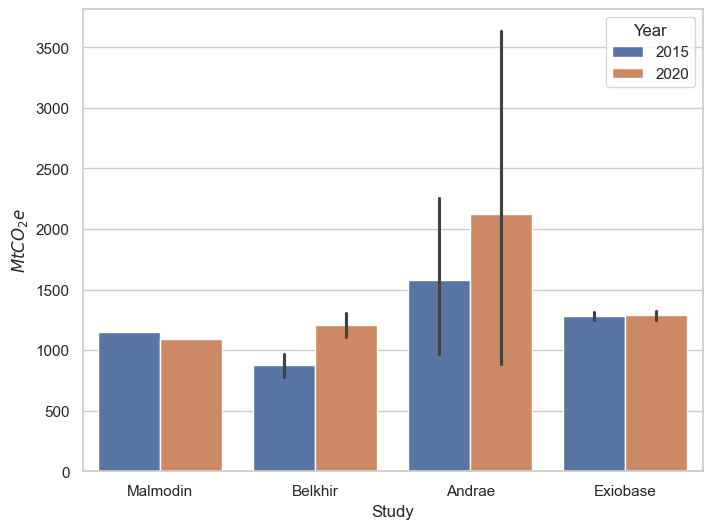

In [3]:
from ict_eeio.eeio import compute_udd_impact
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the years 2015 and 2020
test = {
    "2015": [
        ["Malmodin", 1153],
        ["Belkhir", 775],
        ["Belkhir", 971],
        ["Andrae", 971],
        ["Andrae", 1515],
        ["Andrae", 2257],
        ["Exiobase", kg_to_Mt(compute_udd_impact(exio_ict_agg_2015, "ICT")[0])],
        ["Exiobase", kg_to_Mt(get_cba_impact(exio_ict_agg_2015, "ICT"))],
        # ["Exiobase", kg_to_Mt(get_pba_impact(exio_ict_agg_2015, "ICT"))],
    ],
    "2020": [
        ["Malmodin", 1090],
        ["Belkhir", 1107],
        ["Belkhir", 1306],
        ["Andrae", 887],
        ["Andrae", 1860],
        ["Andrae", 3634],
        ["Exiobase", kg_to_Mt(compute_udd_impact(exio_ict_agg_2020, "ICT")[0])],
        ["Exiobase", kg_to_Mt(get_cba_impact(exio_ict_agg_2020, "ICT"))],
        # ["Exiobase", kg_to_Mt(get_pba_impact(exio_ict_agg_2020, "ICT"))],
    ],
}

# Create DataFrames for each year
df_2015 = pd.DataFrame(test["2015"], columns=["Study", "MtCO2e"])
df_2015["Year"] = "2015"

df_2020 = pd.DataFrame(test["2020"], columns=["Study", "MtCO2e"])
df_2020["Year"] = "2020"

# Combine the DataFrames
combined_df = pd.concat([df_2015, df_2020])

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Study", y="MtCO2e", hue="Year", data=combined_df)
plt.ylabel(r"$MtCO_{2}e$")
# plt.title("CO2 Emissions by Study for 2015 and 2020")
plt.gcf().savefig("figures/carbon_correlation.pdf", bbox_inches="tight")
print((kg_to_Mt(get_cba_impact(exio_ict_agg_2020, "ICT"))))

In [4]:
print(kg_to_Mt(get_cba_impact(exio_ict_agg_2015, "ICT")))
print(kg_to_Mt(get_pba_impact(exio_ict_agg_2015, "ICT")))
print(kg_to_Mt(get_cba_impact(exio_ict_agg_2020, "ICT")))
print(kg_to_Mt(get_pba_impact(exio_ict_agg_2020, "ICT")))

1252.0866223045975
152.26749414914374
1249.8135100782988
188.6970925012652


## Comparaison des catégories d'impact

On regarde l'incidence du choix d'une autre catégorie d'impact pour les GHG


In [5]:
for category in exio_ict_2015.impacts.get_index():
    if "GHG" in str(category):
        print(
            str(
                kg_to_Mt(
                    get_cba_impact(exio_ict_agg_2015, "ICT", impact_category=category)
                )
            )
            + " : "
            + category
        )
        # print(category)

1252.0866223045975 : GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)
1252.1362244634895 : GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 1999) | GWP100 (IPCC, 2007)
1261.7201442279556 : GHG emissions (GWP100min) | Problem oriented approach: non baseline (CML, 1999) | net GWP100 min(Houghton et al., 2001)
1278.5312849808006 : GHG emissions (GWP100max) | Problem oriented approach: non baseline (CML, 1999) | net GWP100 max(Houghton et al., 2001)
1558.797988044811 : GHG emissions (GWP20) | Problem oriented approach: non baseline (CML, 1999) | GWP20 (IPCC, 2007)
1127.1181551265122 : GHG emissions (GWP500) | Problem oriented approach: non baseline (CML, 1999) | GWP500 (IPCC, 2007)
1269.1112603488975 : GHG emissions AR5 (GWP100) | GWP100 (IPCC, 2010)


In [6]:
len(exio_ict_2015.impacts.get_index())

126